In [1]:
import glob
import cv2
import torch
import numpy as np
import torch.nn.functional as F




def rgb_to_gray_image_conversion(filelist):

    rgb_image_list = []
    gray_image_list = []



    for file in filelist:
        image_rgb = cv2.imread(file)
        
        rgb_image_list.append(image_rgb)
        
        gray_image = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2GRAY)
        
        gray_image_list.append(gray_image)
        

    return gray_image_list,rgb_image_list  


def file_to_gray(gray_image_list,index_no):

    
    gray_image = gray_image_list[index_no]
    gray_image = torch.tensor(gray_image).float()
    
    padded_gray_image = F.pad(gray_image, (1, 1, 1, 1), 'constant', 0)
    
    
    return padded_gray_image.detach().numpy() 




filelist = glob.glob('2000/*.png')
filelist.sort()

print(filelist)


gray_image_list,rgb_image_list = rgb_to_gray_image_conversion(filelist)

print(file_to_gray(gray_image_list,0).shape)



['2000/20000901.png', '2000/20000902.png', '2000/20000903.png', '2000/20000904.png', '2000/20000905.png', '2000/20000906.png', '2000/20000907.png', '2000/20000908.png', '2000/20000909.png', '2000/20000910.png', '2000/20000911.png', '2000/20000912.png', '2000/20000913.png', '2000/20000914.png', '2000/20000915.png', '2000/20000916.png', '2000/20000917.png', '2000/20000918.png', '2000/20000919.png', '2000/20000920.png', '2000/20000921.png', '2000/20000922.png', '2000/20000923.png', '2000/20000924.png', '2000/20000925.png', '2000/20000926.png', '2000/20000927.png', '2000/20000928.png', '2000/20000929.png', '2000/20000930.png', '2000/20001001.png', '2000/20001002.png', '2000/20001003.png', '2000/20001004.png', '2000/20001005.png', '2000/20001006.png', '2000/20001007.png', '2000/20001008.png', '2000/20001009.png', '2000/20001010.png', '2000/20001011.png', '2000/20001012.png', '2000/20001013.png', '2000/20001014.png', '2000/20001015.png', '2000/20001016.png', '2000/20001017.png', '2000/200010

In [2]:
import torch
import torch.nn.functional as F

def getIndices(x,kernel_size_h,kernel_size_w,stride_h,stride_w):
    
    indices = {}
    stride = 2
    kernel_size = 2
    h_out = (x.size(0) - kernel_size_h) // stride_h + 1
    w_out = (x.size(1) - kernel_size_w) // stride_w + 1

    for i in range(h_out):
        for j in range(w_out):
            start_i = i * stride_h
            start_j = j * stride_w
            end_i = start_i + kernel_size_h
            end_j = start_j + kernel_size_w
            
            indices[(i, j)] = [
                (start_i, start_j),               # top-left
                (start_i, end_j-1),               # top-right
                (end_i-1, start_j),               # bottom-left
                (end_i-1, end_j-1)                # bottom-right
            ]

    return indices


x = torch.arange(0,332*316, dtype=torch.float).reshape(332,316)
#print("Original tensor:\n", x)


padded_x = F.pad(x, (1, 1, 1, 1), 'constant', 0)
#print("\nPadded tensor:\n", padded_x)


# Applying average pooling
y = F.avg_pool2d(padded_x.unsqueeze(0).unsqueeze(0), kernel_size = (2,2), stride=(2,2)).squeeze()
#print("\nAfter avg pooling:\n", y)

y_output  = F.avg_pool2d(y.unsqueeze(0).unsqueeze(0), kernel_size = (2,2), stride=(2,2)).squeeze()
#print("\nAfter avg pooling:\n", y_output)

indices1= getIndices(padded_x,2,2,2,2)


indices2= getIndices(y,2,2,2,2)


print('indices1')
print(len(indices1))
print('indices2')
print(len(indices2))
combined_indices = {}

for key2, value2 in indices2.items():
    temp_dict = {}
    
    # Fetching corresponding regions from indices1 and storing them
    for idx in value2:
        temp_dict[idx] = indices1[idx]
    
    # Storing the indices from indices2
    #temp_dict['indices2'] = value2
    
    combined_indices[key2] = temp_dict

# Now, the combined_indices dict has the values of indices1 stored inside values from indices2


def getIndices_in_orginal_gray(row,col):
    indices_list_gray_image = [index for sublist in combined_indices[(row,col)].values() for index in sublist]
    # print(indices_list_gray_image)

    # print(len(indices_list_gray_image))
    
    return indices_list_gray_image


print(len(getIndices_in_orginal_gray(2,3)))
print(getIndices_in_orginal_gray(0,0))




indices1
26553
indices2
6557
16
[(0, 0), (0, 1), (1, 0), (1, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 0), (2, 1), (3, 0), (3, 1), (2, 2), (2, 3), (3, 2), (3, 3)]


In [3]:
import pandas as pd
import numpy as np

def getKernel(input):
    
    df = pd.DataFrame(input)

    

    result_df = pd.DataFrame()

    # # Block sizes
    # block_row_size = 83*2
    # block_col_size = 79*2

    # for i in range(0, df.shape[0], block_row_size):
    #     for j in range(0, df.shape[1], block_col_size):
    #         block = df.iloc[i:i+block_row_size, j:j+block_col_size]
    #         #print(block.values)
    #         avg = np.mean(block.values)
    #         std = np.std(block.values)
    #         result_df.loc[i//block_row_size, j//block_col_size] = avg / std


    result_df = np.ones((2,2))
    #print(result_df)
    
    return np.array(result_df)

In [4]:
import numpy as np



            



def get_diff_gray_image_kernel_list(gray_image_list):

    diff_gray_image_list = []
    diff_gray_image_kernel_list_2_2 = []

    for i in range(len(gray_image_list)-1):
        
        arr = gray_image_list[i+1]- gray_image_list[i]

        #np.savetxt('test'+str(i)+'.txt',arr , delimiter='\t', fmt='%d')
        
        diff_gray_image_list.append(arr)
        #print(diff_gray_image_list)
    
        
        kernel_arr = getKernel(arr)
        #np.savetxt('test_kernel'+str(i)+'.txt',kernel_arr , delimiter='\t', fmt='%d')
    
        diff_gray_image_kernel_list_2_2.append(kernel_arr)
        



    return diff_gray_image_list, diff_gray_image_kernel_list_2_2




In [5]:
np.savetxt('20220901'+'.txt',gray_image_list[0] , delimiter='\t', fmt='%d')
np.savetxt('20220902'+'.txt',gray_image_list[1] , delimiter='\t', fmt='%d')

# for i in range(len(diff_gray_image_list)):
#     np.savetxt(str(i+2)+str('-')+str(i+1)+'.txt',diff_gray_image_list[i] , delimiter='\t', fmt='%d')
    

In [6]:
import torch
import torch.nn as nn

import torch
import torch.nn as nn

def apply_3x3_sharpening(input_tensor,kernel):
    # Assuuming input is a 2D matrix, we reshape it to [1, 1, height, width]
    input_tensor = input_tensor.unsqueeze(0).unsqueeze(0)

    # Define the 2x2 sharpening kernel
    kernel_tensor = kernel.unsqueeze(0).unsqueeze(0)
    
    #print(kernel_tensor)
    

    
    kernel_row,kernel_col = len(kernel_tensor), len(kernel_tensor[0])


    # Define the convolutional layer
    conv_layer = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=(kernel_row,kernel_col), stride=(2,2), padding=1, bias=False)
    conv_layer.weight.data = kernel_tensor

    # Apply convolution for sharpening
    output = conv_layer(input_tensor)

    return output[0,0]

def get_kernel_applied_result_in_diff_gray_image(diff_gray_image_list,diff_gray_image_kernel_list_2_2):

    kernel_applied_result_in_diff_gray_image = []
    for i in range(len(diff_gray_image_list)):
        matrix = torch.tensor(diff_gray_image_list[i]).float()
        kernel = torch.tensor(diff_gray_image_kernel_list_2_2[i]).float()

        # print("Input matrix:\n", matrix)

        result = apply_3x3_sharpening(matrix,kernel).detach().numpy()
        # print("\nResult after 2x2 sharpening:\n", result)



        #np.savetxt('test_after_apply_kernel'+str(i)+'.txt',result, delimiter='\t', fmt='%d')

        # print(result.shape)
        
        kernel_applied_result_in_diff_gray_image.append(result)


    return kernel_applied_result_in_diff_gray_image
    
diff_gray_image_list, diff_gray_image_kernel_list_2_2 = get_diff_gray_image_kernel_list(gray_image_list)
np.savetxt('kerenel_applied_diff_2-1.txt', get_kernel_applied_result_in_diff_gray_image(diff_gray_image_list,diff_gray_image_kernel_list_2_2)[0], delimiter='\t', fmt='%d')

In [7]:
import numpy as np

def truncating_array_83_79(original_array):

    # Define the pooling parameters
    pool_size = (2, 2)
    stride = 2

    # Calculate the dimensions of the output array
    output_height = (original_array.shape[1] - pool_size[0]) // stride + 1
    output_width = (original_array.shape[2] - pool_size[1]) // stride + 1


    # Initialize the output array
    output_array = np.zeros((original_array.shape[0], output_height, output_width, 4))

    # Apply 2x2 average pooling with a stride of 2
    for i in range(output_height):
        for j in range(output_width):
            # Define the pooling region
            region = original_array[:, i * stride:i * stride + pool_size[0], j * stride:j * stride + pool_size[1]]
            # Reshape the region to a (4,) array and store it in the output array
            #print(region)
            output_array[:, i, j] = region.reshape(-1, 4)


    data = output_array

    # Reshape the data into a (83, 79) array where each grid has a list of values with shape 4x4858
    reshaped_data = data #data.swapaxes(0, 3).reshape(83, 79, -1)


    return reshaped_data



In [8]:
import numpy as np
from itertools import chain
import os

def pooling(input_matrix, pool_height, pool_width, stride_height, stride_width, pool_type):



    


    if (pool_type == 'max'):
       
       input_matrix1 = input_matrix


       input_matrix2 = np.where(input_matrix1 > 0, 0, input_matrix1)

       input_matrix3 = np.abs(input_matrix2)

       input_tensor = torch.tensor(input_matrix3)
       input_tensor = input_tensor.unsqueeze(0).unsqueeze(0)




       max_pool = nn.MaxPool2d(kernel_size = (pool_height, pool_width) , stride= (stride_height, stride_width) )

       return_max = max_pool(input_tensor)[0][0].detach().numpy()
       
       return -1.0*return_max
       
    elif(pool_type == 'mean'):

        input_matrix1 = input_matrix

        input_tensor = torch.tensor(input_matrix1)
        input_tensor = input_tensor.unsqueeze(0).unsqueeze(0)
        
        mean_pool = nn.AvgPool2d(kernel_size = (pool_height, pool_width) , stride= (stride_height, stride_width) )
        
        return mean_pool(input_tensor)[0][0].detach().numpy()

# Example usage

def optimalSoulition(matrix,total_std,main_folder,q1,filelist,which_constant,index = 0):

    r,c = 2,2

    filename2 = filelist[index+1][5:]
    
    filename1 = filelist[index][5:]
   
    
    folder = main_folder+'/'+str(filename2[:-4])+'-'+str(filename1[:-4])
    
    if not os.path.exists(folder):
        os.makedirs(folder)
    
    folder = folder+'/'
    
            

    
    # sub_folder = folder+str(r)+str('x')+str(c) #'_'+str(filename[index+1][:-4])+'-'+str(filename[index][:-4])
    # if not os.path.exists(sub_folder):
    #     os.makedirs(sub_folder)
    
    # print(sub_folder)
    

    max_pooled = pooling(matrix, pool_height=r, pool_width=c, stride_height=r, stride_width=c, pool_type='max')
    
    #print('max pool shape')
    # print(max_pooled.shape)
    # print(total_std.shape)
    # print(q1.shape)
    
    
    mean_pooled = pooling(matrix, pool_height=r, pool_width=c, stride_height=r, stride_width=c, pool_type='mean')
    # print("\nMean pooled:\n", mean_pooled)
    # print('mean_pool')
    # print(mean_pooled.shape)
    #print(list(chain.from_iterable(mean_pooled)).count(0))
    #print(list(mean_pooled))
    
    row,col = max_pooled.shape
    # print(row,col)
    
    ### filename given################
    
    filename_extension = folder+str(r)+str('x')+str(c)+'_'+str(which_constant)+'_'+str(filename2[:-4])+'-'+str(filename1[:-4])
    # np.savetxt(filename_extension+str('_max_pool_orginal')+'.txt', max_pooled, delimiter='\t', fmt='%d')
    # np.savetxt(filename_extension+str('_mean_pool_orginal')+'.txt', mean_pooled, delimiter='\t', fmt='%d') 
    
    
    #################### anomaly discord##################################################
    saveFile = False
    
    anomaly_discord_array = np.zeros((334, 318))
    gray_orginal_array = file_to_gray(gray_image_list,index+1)
    anomaly_discord_all_row_col_list = []
    
    

   

    for i in range(row):
        for j in range(col):
            if max_pooled[i][j] < total_std[i][j]:
                if mean_pooled[i][j]/max_pooled[i][j] > q1[i][j]/total_std[i][j]:

                    
                    # print('comparison')
                    
                    # print(mean_pooled[i][j],max_pooled[i][j],total_std,total_std/q1,mean_pooled[i][j]/max_pooled[i][j])
                    
                    getIndices_anomaly = getIndices_in_orginal_gray(i,j)
                    anomaly_discord_all_row_col_list.append(getIndices_anomaly)
                    saveFile = True
    #if( saveFile):
    # print('sdkhgd')
    # print(len(anomaly_discord_all_row_col_list))
    
    for iii in range(len(anomaly_discord_all_row_col_list)):
            
        iterativeList = anomaly_discord_all_row_col_list[iii]
        # print('itetrstibe')
        # print(iterativeList)
        
        for item in iterativeList:
            
            rowIndex,colIndex = item
            
            anomaly_discord_array[rowIndex,colIndex] = gray_orginal_array[rowIndex,colIndex]
        
        
    anomaly_discord_array=anomaly_discord_array[1:-1, 1:-1]
    

    # print(filename_extension)
    np.savetxt(filename_extension+str('_anomaly_discord')+'.txt', anomaly_discord_array, delimiter='\t', fmt='%d')
    #np.savetxt(filename_extension+str('_mean_pool_anomaly_discord')+'.txt', meanpooled_anomaly_discord, delimiter='\t', fmt='%d')
    
    
          
    
    
    ################################# orginal hh ###########################################
    
    
    saveFile = False
    
    hh_array = np.zeros((334, 318))

    hh_all_row_col_list = []
    
    
    counter = 0


    for i in range(row):
        for j in range(col):
            if max_pooled[i][j] < total_std[i][j]:
                if 0 < mean_pooled[i][j]/max_pooled[i][j] < q1[i][j]/total_std[i][j]:  
                    counter += 1              
                    getIndices_hh = getIndices_in_orginal_gray(i,j)
                    hh_all_row_col_list.append(getIndices_hh)
                    saveFile = True
        
        
    # print('sjdhgkhgsdkhgd')
    # print(len(hh_all_row_col_list))
    
    for iii in range(len(hh_all_row_col_list)):
            
        iterativeList = hh_all_row_col_list[iii]
        # print('itetrstibe')
        # print(iterativeList)
        
        for item in iterativeList:
            #print(item)
            
            rowIndex,colIndex = item
            
            hh_array[rowIndex,colIndex] = gray_orginal_array[rowIndex,colIndex]
        
        #print(hh_array)
    hh_array = hh_array[1:-1, 1:-1]
    #print(hh_array)
    # print('counter')
    # print(counter)         
    np.savetxt(filename_extension+str('_hh')+'.txt', hh_array, delimiter='\t', fmt='%d')




   ################################# orginal ss ###########################################

    saveFile = False
    
    ss_array = np.zeros((334, 318))

    ss_all_row_col_list = []
    
    
    counter = 0


    for i in range(row):
        for j in range(col):
            
            if 0 < mean_pooled[i][j] < q1[i][j]:  
                counter += 1              
                getIndices_ss = getIndices_in_orginal_gray(i,j)
                ss_all_row_col_list.append(getIndices_ss)
                saveFile = True
        
        
    # print('sjdhgkhgsdkhgd')
    # print(len(ss_all_row_col_list))
    
    for iii in range(len(ss_all_row_col_list)):
            
        iterativeList = ss_all_row_col_list[iii]
        # print('itetrstibe')
        # print(iterativeList)
        
        for item in iterativeList:
            #print(item)
            
            rowIndex,colIndex = item
            
            ss_array[rowIndex,colIndex] = gray_orginal_array[rowIndex,colIndex]
        
        #print(ss_array)
    ss_array = ss_array[1:-1, 1:-1]
    #print(ss_array)
    # print('counter')
    # print(counter)         
    np.savetxt(filename_extension+str('_ss')+'.txt', ss_array, delimiter='\t', fmt='%d')
    
    
    
    
    
           




################################# our code starts############################






In [9]:
kernel_applied_result_in_diff_gray_image_overall =  []
for year in range(2000,2023):
    filelist = glob.glob(str(year)+'/*.png')
    filelist.sort()

    


    gray_image_list,rgb_image_list = rgb_to_gray_image_conversion(filelist)
    diff_gray_image_list, diff_gray_image_kernel_list_2_2 = get_diff_gray_image_kernel_list(gray_image_list)

  

    temp_arr = get_kernel_applied_result_in_diff_gray_image(diff_gray_image_list,diff_gray_image_kernel_list_2_2)

    print(np.array(temp_arr).shape)
    

    non_zero_values = temp_arr

    kernel_applied_result_in_diff_gray_image_overall += list(non_zero_values)


    






(241, 167, 159)
(241, 167, 159)
(241, 167, 159)
(242, 167, 159)
(241, 167, 159)
(241, 167, 159)
(241, 167, 159)
(242, 167, 159)
(241, 167, 159)
(241, 167, 159)
(241, 167, 159)
(242, 167, 159)
(241, 167, 159)
(241, 167, 159)
(241, 167, 159)
(242, 167, 159)
(241, 167, 159)
(241, 167, 159)
(241, 167, 159)
(242, 167, 159)
(241, 167, 159)
(241, 167, 159)
(241, 167, 159)


In [10]:
data_for_calculating_83_79 = truncating_array_83_79(np.array(kernel_applied_result_in_diff_gray_image_overall))



In [11]:
print(data_for_calculating_83_79.shape)

(5548, 83, 79, 4)


1.5


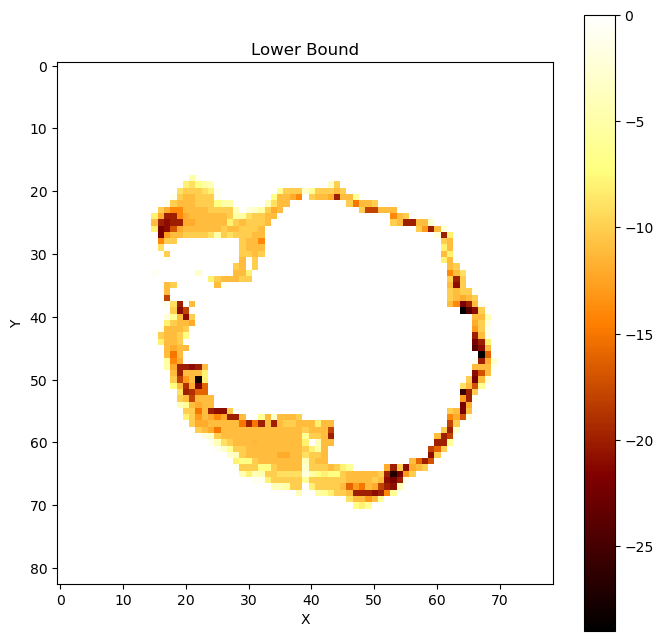

In [12]:


import numpy as np
import glob
import datetime
from datetime import date
from datetime import timedelta
# import datetime
# from dateutil.relativedelta import relativedelta
# from datetime import datetime
# import pandas as pd
import os
from netCDF4 import Dataset
import netCDF4 as nc
import xarray as xr
# from osgeo import gdal
# import geopandas as gpd
# from shapely.geometry import MultiPolygon, Polygon, Point
# from scipy import io
import pandas as pd
from scipy.stats import iqr

list_of_files = glob.glob('*lb*q1.txt')  # create the list of file
x= data_for_calculating_83_79

row, col = 83,79
intial = 15
#for kk in np.arange(1.5, , 0.1):
kk = 1.5
print(kk)

lower_bound, q1_for_future_use =np.zeros((row,col)),np.zeros((row,col))

for i in range(row):
    for j in range(col):
        q1=np.percentile(x[:,i,j,:], 25)

        iqr1=iqr(x[:,i,j,:])
        
        lb=q1-kk*iqr1
        lower_bound[i,j]= lb
        q1_for_future_use[i,j] = q1

np.savetxt('lb'+str(intial)+'.txt', lower_bound, delimiter='\t', fmt='%.4f')
np.savetxt('q1'+str(intial)+'.txt', q1_for_future_use, delimiter='\t', fmt='%.4f')

intial += 1

       
        
        
# Create a figure and axis


import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 8))

# Display the 2D matrix as an image
im = ax.imshow(q1_for_future_use, cmap='afmhot')  # You can change the colormap to your preference

# Add a colorbar to the plot (optional)
cbar = fig.colorbar(im, ax=ax)

# Set labels and title (optional)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Lower Bound')

# Show the plot
plt.show()   

In [13]:
# for i in range(len(kernel_applied_result_in_diff_gray_image_overall)):
#     np.savetxt(str(i)+str('_lb_q1')+'.txt', kernel_applied_result_in_diff_gray_image_overall[i], delimiter='\t', fmt='%.2f')

In [14]:
q1, total_std = q1_for_future_use, lower_bound




In [ ]:






iterator = 0


for year in range(2000,2023):
    filelist = glob.glob(str(year)+'/*.png')
    filelist.sort()

    print(filelist)


    gray_image_list,rgb_image_list = rgb_to_gray_image_conversion(filelist)
    diff_gray_image_list, diff_gray_image_kernel_list_2_2 = get_diff_gray_image_kernel_list(gray_image_list)

    folder_holder = 'anomaly_discord_and_ss_with_IQR_'+str(year)
                        
    if not os.path.exists(folder_holder):
        print('I am here')
        os.makedirs(folder_holder)


    kernel_applied_result_in_diff_gray_image = get_kernel_applied_result_in_diff_gray_image(diff_gray_image_list,diff_gray_image_kernel_list_2_2)

    #print('shape of the kernel_applied')
    #print(np.array(kernel_applied_result_in_diff_gray_image).shape)

    #total_std,q1 = calculateIQR(kernel_applied_result_in_diff_gray_image)
    
    for i in range(len(kernel_applied_result_in_diff_gray_image)):                    
                
        matrix = kernel_applied_result_in_diff_gray_image[i]



        for kkkk in range(15,16,1):
            
            total_std = np.loadtxt('lb'+str(kkkk)+'.txt')
            q1 = np.loadtxt('q1'+str(kkkk)+'.txt')
            
            optimalSoulition(matrix,total_std,folder_holder,q1,filelist,kkkk,i)
    

    





print('we are complete',iterator)
   


# max pool shape
# (83, 79)

In [16]:
########################## Below code are auxilary function####################################
########################## Below code are auxilary function####################################
########################## Below code are auxilary function####################################

########################## Below code are auxilary function####################################
########################## Below code are auxilary function####################################
########################## Below code are auxilary function####################################


########################## Below code are auxilary function ####################################
########################## Below code are auxilary function ####################################

In [17]:
# import numpy as np

# # Sample padded array (334x318)
# padded_array = np.random.randint(0, 10, (334, 318))  # Creating a random array for demonstration purposes

# print("Padded array shape:", padded_array.shape)
# print(padded_array)

# # Removing the padding by indexing
# unpadded_array = padded_array[1:-1, 1:-1]

# print("Unpadded array shape:", unpadded_array.shape)
# print(unpadded_array)



In [1]:
import timeit

# Wrap the code in a timeit block
runtime = timeit.timeit(lambda: optimalSoulition(matrix, total_std, main_folder, q1, filelist, which_constant, index=0), number=1)

# Print the runtime
print(f"Runtime: {runtime} seconds")


NameError: name 'optimalSoulition' is not defined